In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('heart 2.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [4]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
x = df[["Age", "RestingBP", "Cholesterol","MaxHR"]]
y = df[["HeartDisease"]]

In [6]:
x

,Age,RestingBP,Cholesterol,MaxHR
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122
...,...,...,...,...
913,45,110,264,132
914,68,144,193,141
915,57,130,131,115
916,57,130,236,174


In [8]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [9]:
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()

In [10]:
df_mm = StandardScaler.fit_transform(x)
df_mm

array([[-1.4331398 ,  0.41090889,  0.82507026,  1.38292822],
       [-0.47848359,  1.49175234, -0.17196105,  0.75415714],
       [-1.75135854, -0.12951283,  0.7701878 , -1.52513802],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, -0.85706875],
       [ 0.37009972, -0.12951283,  0.34027522,  1.4615246 ],
       [-1.64528563,  0.30282455, -0.21769643,  1.42222641]])

In [11]:
x_mm = pd.DataFrame(data=df_mm,columns=x.columns)
x_mm

,Age,RestingBP,Cholesterol,MaxHR
0,-1.433140,0.410909,0.825070,1.382928
1,-0.478484,1.491752,-0.171961,0.754157
2,-1.751359,-0.129513,0.770188,-1.525138
3,-0.584556,0.302825,0.139040,-1.132156
4,0.051881,0.951331,-0.034755,-0.581981
...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999
914,1.536902,0.627078,-0.053049,0.164684
915,0.370100,-0.129513,-0.620168,-0.857069
916,0.370100,-0.129513,0.340275,1.461525


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_mm,y,train_size=0.7,random_state=111)
X_train

,Age,RestingBP,Cholesterol,MaxHR
228,-1.327067,-0.669935,0.879953,1.304332
195,0.900464,1.491752,-0.053049,-0.817771
150,-1.539213,-0.129513,0.148187,-0.660578
399,0.794391,3.653439,-1.818435,-2.625487
134,0.794391,-0.129513,0.870806,-0.660578
...,...,...,...,...
275,0.582246,2.572596,0.129892,-1.446542
86,1.218683,2.032174,0.587246,-0.974963
724,-0.902775,-1.102272,-0.354903,0.046790
876,0.688318,-0.129513,0.065863,-0.188999


In [14]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform',metric='minkowski')

knn.fit(X_train,y_train)

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm_df =pd.DataFrame(data=cm,
            index =[f'True Class-{i}' for i in range(cm.shape[0])],
            columns = [f'Predicted Calss-{i}' for i in range(cm.shape[0])])
cm_df

,Predicted Calss-0,Predicted Calss-1
True Class-0,60,46
True Class-1,50,120


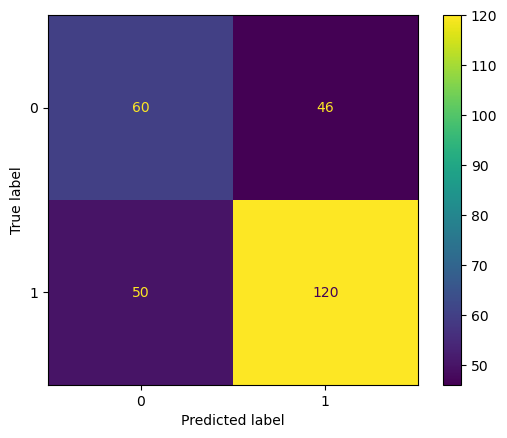

In [18]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [19]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [21]:
# 정확도
ac = knn.score(X_test,y_test)
print(f'정확도는',ac)

# 정밀도
ps = precision_score(y_test,y_pred)
print(f'정밀도는',ps)

# 민감도
rs = recall_score(y_test,y_pred)
print(f'민감도는',rs)

# f1 score
f1 = f1_score(y_test,y_pred)
print(f'f1 Score는',f1)

정확도는 0.6521739130434783
정밀도는 0.7228915662650602
민감도는 0.7058823529411765
f1 Score는 0.7142857142857143
